# Noise model diagnostics: autocorrelation of the residuals

This example shows how to use the autocorrelation plots of the residuals to check assumptions of the noise model.

Three cases are shown. In the first two, optimisation is used to obtain a best-fit parameter vector in a single output problem. In the first case the noise is correctly specified and in the second case the noise is misspecified. The third case demonstrates the same method in a multiple output problem with Bayesian inference.

## Case 1: Correctly specified noise

For the first example, we will use optimisation to obtain the best-fit parameter vector. See [Optimisation First Example](../../optimisation/first-example.ipynb) for more details. We begin with a problem in which the noise is correctly specified: both the data generation and the model use independent Gaussian noise.

In [1]:
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)

# Set up the problem and run the optimisation 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      4406245    0:00.0
1     12     4406245    0:00.0
2     18     4366370    0:00.0
3     24     4352033    0:00.0
20    126    1587065    0:00.0
40    246    1086640    0:00.0
60    366    201989.4   0:00.0
80    486    193453     0:00.0
100   606    193449.2   0:00.0
120   726    193449.2   0:00.1
140   846    193449.2   0:00.1
160   966    193449.2   0:00.1
180   1086   193449.2   0:00.1
200   1206   193449.2   0:00.1
220   1326   193449.2   0:00.1
240   1446   193449.2   0:00.1
260   1566   193449.2   0:00.1
280   1686   193449.2   0:00.1
300   1806   193449.2   0:00.1
320   1926   193449.2   0:00.1
340   2046   193449.2   0:00.2
360   2166   193449.2   0:00.2
380   2286   193449.2   0:00.2
400   2406   193449.2   0:00.2
420   2526   193449.2   0:00.2
440   2646   193449.2   0:00.2
460   2766   193449.2   0:00.2
480   28

### Visualisation of the data
After obtaining these parameters, it is useful to visualise the data and the fit.

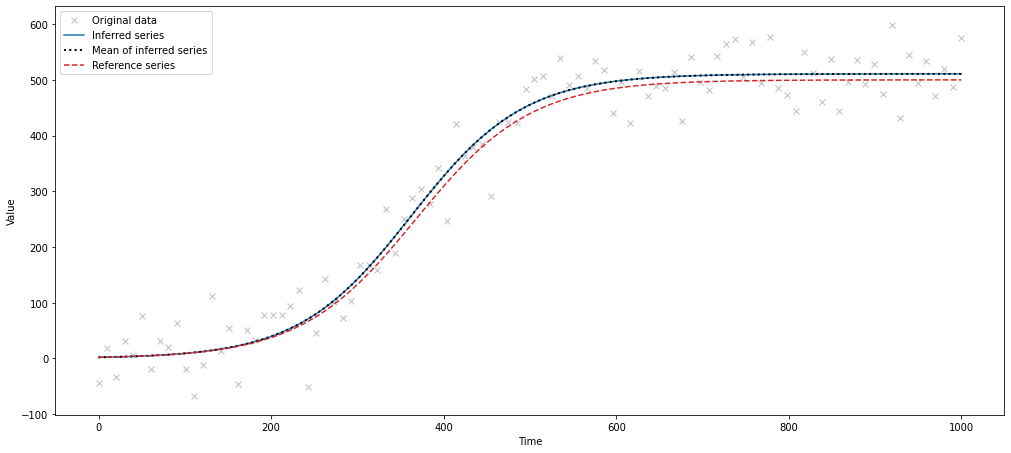

In [2]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

### Plotting autocorrelation of the residuals
Next we look at the autocorrelation plot of the residuals to evaluate the noise model (using [pints.residuals_diagnostics.plot_residuals_autocorrelation](https://pints.readthedocs.io/en/latest/noise_model_diagnostics.html#pints.residuals_diagnostics.plot_residuals_autocorrelation)).

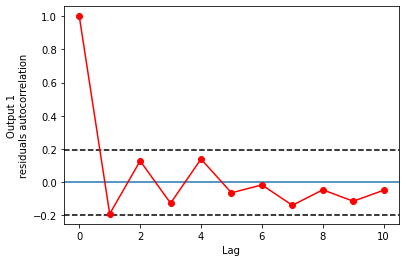

In [3]:
from pints.residuals_diagnostics import plot_residuals_autocorrelation

# Plot the autocorrelation
fig = plot_residuals_autocorrelation(np.array([found_parameters]),
                                     problem)

plt.show()


The figure shows no significant autocorrelation in the residuals. Therefore, the assumption of independent noise may be valid.

## Case 2: Incorrectly specified noise

For the next case, we generate data with an AR(1) (first order autoregressive) noise model. However, we deliberately misspecify the model and assume independent Gaussian noise (as before) when fitting the parameters.

In [4]:
import pints.noise

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add AR(1) noise
rho = 0.75
sigma = 50
values = org_values + pints.noise.ar1(rho, sigma, len(org_values))

# Set up the problem and run the optimisation 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      4236937    0:00.0
1     12     4207210    0:00.0
2     18     4207210    0:00.0
3     24     4066935    0:00.0
20    126    1687964    0:00.0
40    246    980462.1   0:00.0
60    366    310376.4   0:00.0
80    486    221970.9   0:00.0
100   606    221894.8   0:00.1
120   726    221894.8   0:00.1
140   846    221894.8   0:00.1
160   966    221894.8   0:00.1
180   1086   221894.8   0:00.1
200   1206   221894.8   0:00.1
220   1326   221894.8   0:00.1
240   1446   221894.8   0:00.1
260   1566   221894.8   0:00.1
280   1686   221894.8   0:00.1
300   1806   221894.8   0:00.1
320   1926   221894.8   0:00.2
340   2046   221894.8   0:00.2
360   2166   221894.8   0:00.2
380   2286   221894.8   0:00.2
400   2406   221894.8   0:00.2
420   2526   221894.8   0:00.2
440   2646   221894.8   0:00.2
446   2676   221894.8   0:00.2
Halting:

### Visualisation of the data
As before we plot the data and the inferred trajectory.

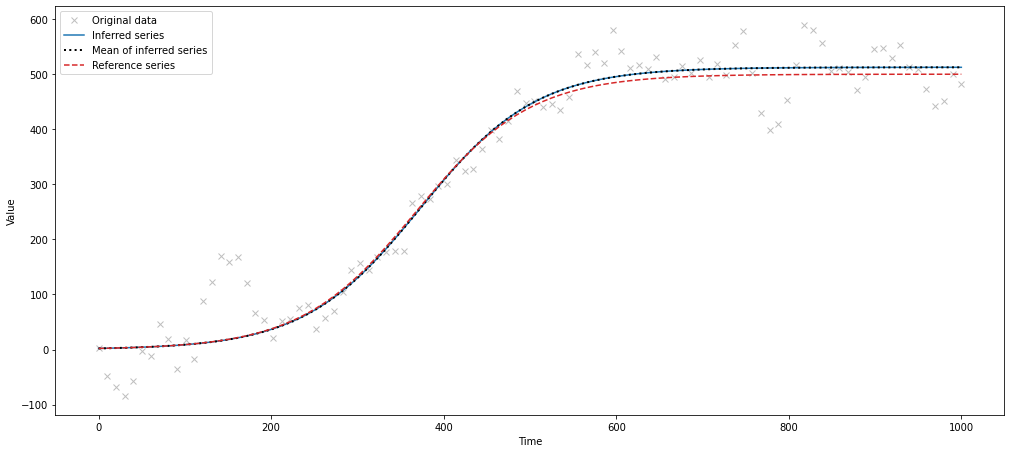

In [5]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

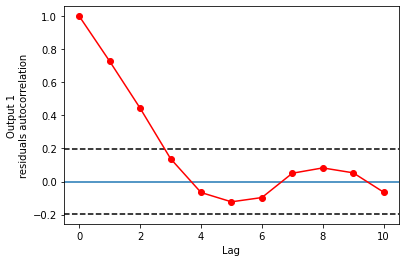

In [6]:
# Plot the autocorrelation
fig = plot_residuals_autocorrelation(np.array([found_parameters]),
                                     problem)

plt.show()

Now the autocorrelation plot of the residuals shows high autocorrelation at small lags, which is typical of AR(1) noise. Therefore, this visualisation suggests that the assumption of independent Gaussian noise which we made during inference is invalid.

## Case 3: Multiple output Bayesian inference problem 

The `plot_residuals_autocorrelation` function also works with Bayesian inference and multiple output problems. For the final example, we demonstrate the same strategy in this setting.

For this example, the Lotka-Volterra model is used. See the [Lotka-Volterra example](../toy/model-lotka-volterra.ipynb) for more details. As in Case 1, the true data is generated with independent Gaussian noise.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pints
import pints.toy

model = pints.toy.LotkaVolterraModel()

times = np.linspace(0, 3, 50)
parameters = model.suggested_parameters()
model.set_initial_conditions([2, 2])
org_values = model.simulate(parameters, times)

# Add noise
sigma = 0.1
values = org_values + np.random.normal(0, sigma, org_values.shape)

# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([0, 0, 0, 0, 0, 0], [6, 6, 6, 6, 1, 1])
log_likelihood = pints.GaussianLogLikelihood(problem)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Run MCMC on the noisy data
x0 = [[1.0, 1.0, 1.0, 1.0, 0.1, 0.1]]*3
mcmc = pints.MCMCController(log_posterior, 3, x0)
mcmc.set_max_iterations(4000)

print('Running')
chains = mcmc.run()
print('Done!')

Running
Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0         0.5        0:00.0
2     9      0         0.333     0.333      0:00.0
3     12     0         0.25      0.25       0:00.0
20    63     0.381     0.429     0.381      0:00.0
40    123    0.341     0.415     0.366      0:00.1
60    183    0.246     0.311     0.246      0:00.1
80    243    0.185     0.247     0.185      0:00.1
100   303    0.158     0.198     0.158      0:00.2
120   363    0.132     0.165     0.14       0:00.2
140   423    0.113     0.141844  0.135      0:00.2
160   483    0.0994    0.124     0.118      0:00.3
180   543    0.0884    0.116     0.105      0:00.3
Initial phase completed.
200   603    0.0796    0.114     0.0945     0:00.3
220   663    0.086     0.131     0.104      0:00.4
240   723    0.129     0.145     0.141      0:00.4
260 

3220  9663   0.21      0.213     0.203      0:04.8
3240  9723   0.211     0.213     0.203      0:04.8
3260  9783   0.21      0.212     0.202      0:04.8
3280  9843   0.211     0.212     0.202      0:04.9
3300  9903   0.212057  0.212057  0.201      0:04.9
3320  9963   0.212     0.213     0.201      0:04.9
3340  10023  0.213     0.213     0.201      0:05.0
3360  10083  0.213     0.213     0.201      0:05.0
3380  10143  0.212659  0.214     0.201      0:05.0
3400  10203  0.212     0.214     0.2        0:05.0
3420  10263  0.211     0.215     0.2        0:05.1
3440  10323  0.211     0.215     0.2        0:05.1
3460  10383  0.211     0.215     0.201      0:05.1
3480  10443  0.211     0.215     0.201      0:05.2
3500  10503  0.212     0.215     0.201      0:05.2
3520  10563  0.212     0.215     0.201      0:05.2
3540  10623  0.212087  0.215     0.201638   0:05.2
3560  10683  0.212     0.217     0.202      0:05.3
3580  10743  0.211     0.217     0.202      0:05.3
3600  10803  0.211     0.217   

### Visualisation of the data
As before we plot the data and the inferred trajectories.

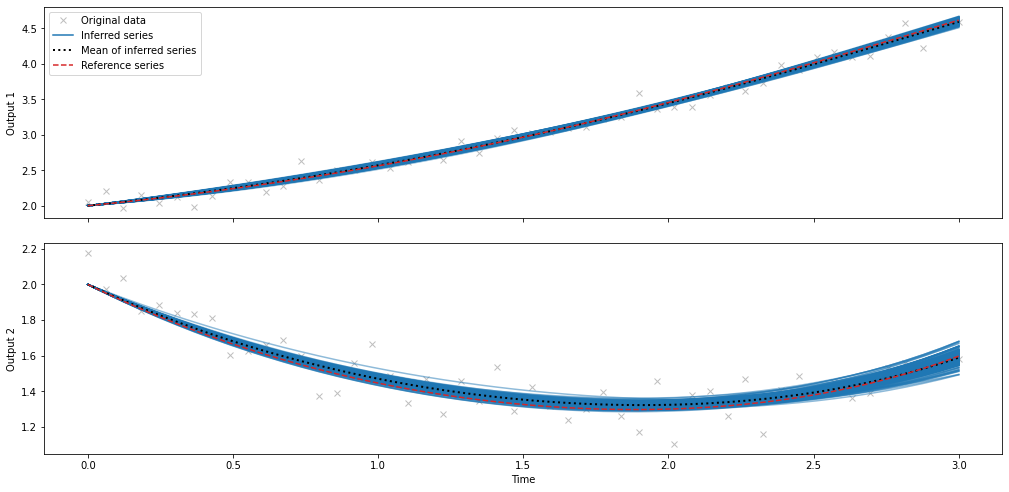

In [8]:
# Get the first MCMC chain
chain1 = chains[0]

# Cut off the burn-in samples
chain1 = chain1[2500:]

fig, ax = pints.plot.series(chain1, problem, ref_parameters=parameters)
fig.set_size_inches(15, 7.5)
plt.show()

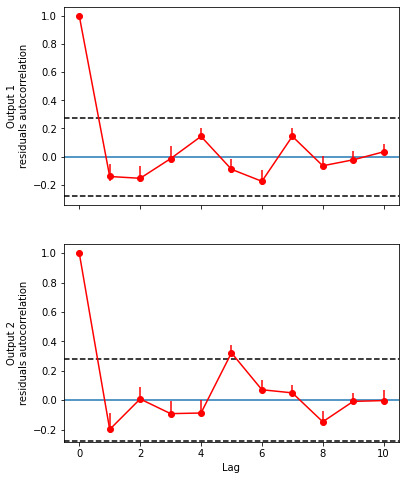

In [9]:
# Plot the autocorrelation
fig = plot_residuals_autocorrelation(chain1, problem)

plt.show()

The `plot_residuals_autocorrelation` function generates one residuals plot for each output. Additionally, since Bayesian inference was performed and an MCMC chain was provided to the function, it draws a diagram of the distribution of the autocorrelations at each lag over the MCMC samples. Each dot indicates the median autocorrelation, and the bars show the extent of the 95% posterior interval.

In both outputs, no significant autocorrelation in the residuals is seen, as expected since independent Gaussian noise was used to generate the data.